# Data Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import catboost as cb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import KFold
# Import Data
option_train = pd.read_csv("option_train.csv")

In [2]:
option_train.head(10)

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,Under
1,0.125000,427.015526,465.0,0.166667,0.03126,Over
2,20.691244,427.762336,415.0,0.265873,0.03116,Under
3,1.035002,451.711658,460.0,0.063492,0.02972,Over
4,39.553020,446.718974,410.0,0.166667,0.02962,Under
5,2.505002,436.958530,460.0,0.333333,0.03023,Over
6,4.315000,427.015526,435.0,0.166667,0.03126,Over
7,0.345002,428.996368,455.0,0.154762,0.03116,Over
8,27.297423,444.186127,420.0,0.150794,0.02993,Under
9,0.190000,429.314292,460.0,0.150794,0.03085,Over


## Data Quality and Cleaning

In [3]:
option_train.describe()

,Value,S,K,tau,r
count,1678.000000,1679.000000,1678.000000,1679.000000,1680.000000
mean,15.068709,464.402535,438.241955,0.437519,0.030235
std,14.040023,973.652179,23.408989,7.057555,0.000557
min,0.125000,0.000000,375.000000,0.003968,0.029510
25%,2.255001,433.863864,420.000000,0.119048,0.029820
50%,11.190967,442.634081,440.000000,0.202381,0.030130
75%,25.747434,447.320414,455.000000,0.285714,0.030540
max,60.149367,40333.000000,500.000000,250.000000,0.031880


In [4]:
for var in option_train.columns:
    print('Variable [{}]------'.format(var))
    print("Num of null: {}".format(pd.isna(option_train[var]).sum()))
    print("Num of Unique: {}".format(len(option_train[var].unique())))
    print("Most Common: {}".format(option_train[var].value_counts().head(1).index[0]))
    print("Num 0: {}\n".format(((option_train[var]==0).sum())))

Variable [Value]------
Num of null: 2
Num of Unique: 1624
Most Common: 0.190000001
Num 0: 0

Variable [S]------
Num of null: 1
Num of Unique: 202
Most Common: 444.3587258
Num 0: 1

Variable [K]------
Num of null: 2
Num of Unique: 26
Most Common: 440.0
Num 0: 0

Variable [tau]------
Num of null: 1
Num of Unique: 88
Most Common: 0.261904762
Num 0: 0

Variable [r]------
Num of null: 0
Num of Unique: 20
Most Common: 0.02962
Num 0: 0

Variable [BS]------
Num of null: 0
Num of Unique: 2
Most Common: Under
Num 0: 0



In [5]:
# Null rows
null_rows = option_train.isnull().any(axis=1)

# filter the dataframe to show only rows with null values
rows_with_null = option_train[null_rows].index

# print the index of the rows with null values
print(rows_with_null)

Index([53, 292, 818], dtype='int64')


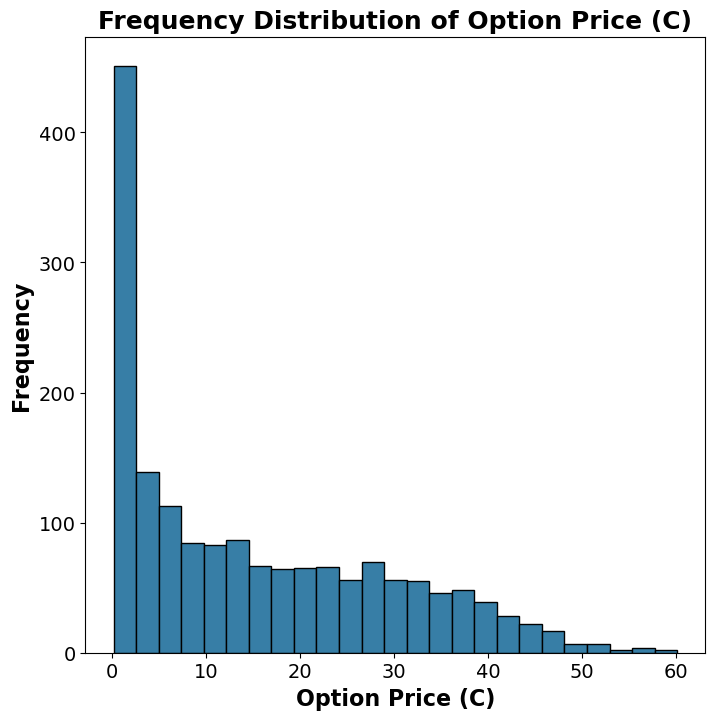

In [6]:
option_train["Value"].plot.hist(bins=25,edgecolor='black',figsize = (8,8), color = '#377EA6')
plt.ylabel('Frequency',fontsize=16, fontweight="bold")
plt.xlabel('Option Price (C)',fontsize=16, fontweight="bold")
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title('Frequency Distribution of Option Price (C)', fontweight="bold",fontsize=18)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('white')  # Set background color

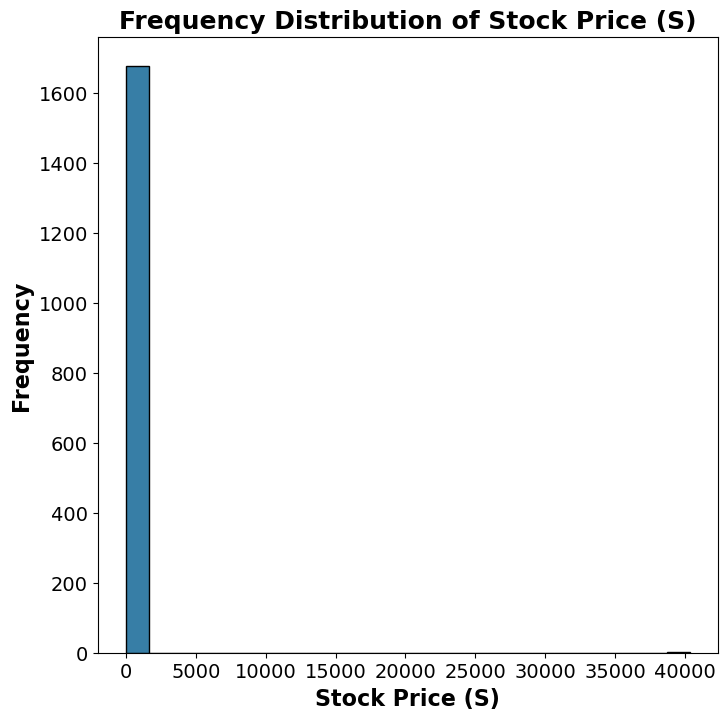

In [7]:
option_train["S"].plot.hist(bins=25,edgecolor='black',figsize = (8,8),
                                                color = '#377EA6')
#plt.ylabel('Log Frequency',fontsize=14)
plt.xlabel('Stock Price (S)',fontsize=16, fontweight="bold")
plt.ylabel('Frequency',fontsize=16, fontweight="bold")
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title('Frequency Distribution of Stock Price (S)', fontweight="bold",fontsize=18)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('white')  # Set background color

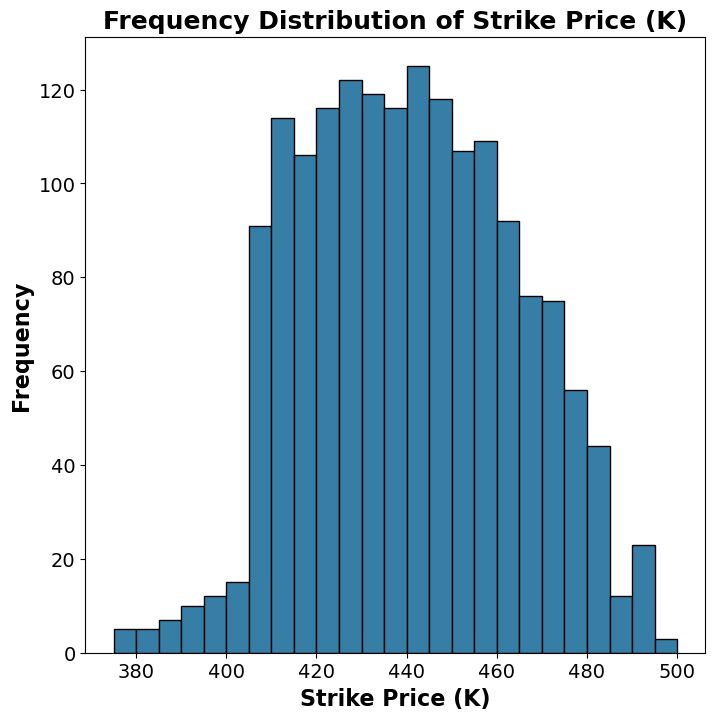

In [8]:
option_train["K"].plot.hist(bins=25,edgecolor='black',figsize = (8,8),
                                                color = '#377EA6')
plt.ylabel('Frequency',fontsize=16,fontweight="bold")
plt.xlabel('Strike Price (K)',fontsize=16,fontweight="bold")
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title('Frequency Distribution of Strike Price (K)', fontweight="bold",fontsize=18)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('white')  # Set background color

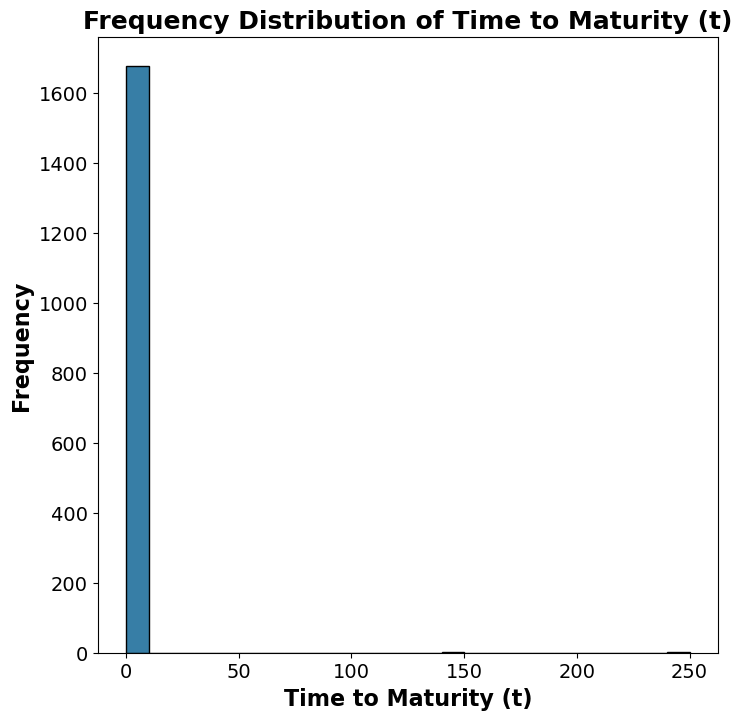

In [9]:
option_train["tau"].plot.hist(bins=25,edgecolor='black',figsize = (8,8),
                                                color = '#377EA6')
plt.ylabel('Frequency',fontsize=16, fontweight="bold")
plt.xlabel('Time to Maturity (t)',fontsize=16, fontweight="bold")
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title('Frequency Distribution of Time to Maturity (t)', fontweight="bold",fontsize=18)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('white')  # Set background color

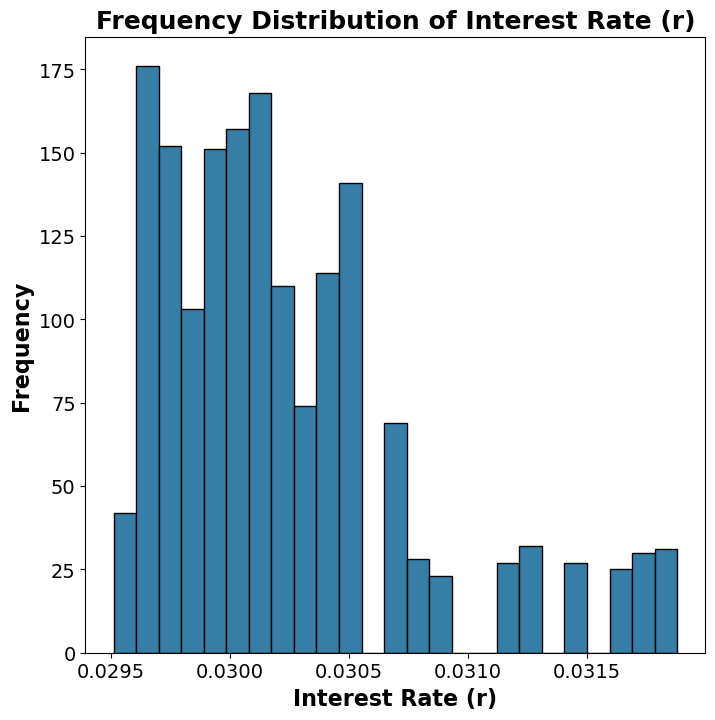

In [10]:
option_train["r"].plot.hist(bins=25,edgecolor='black',figsize = (8,8),
                                                color = '#377EA6')
plt.ylabel('Frequency',fontsize=16, fontweight="bold")
plt.xlabel('Interest Rate (r)',fontsize=16, fontweight="bold")
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title('Frequency Distribution of Interest Rate (r)', fontweight="bold",fontsize=18)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('white')  # Set background color

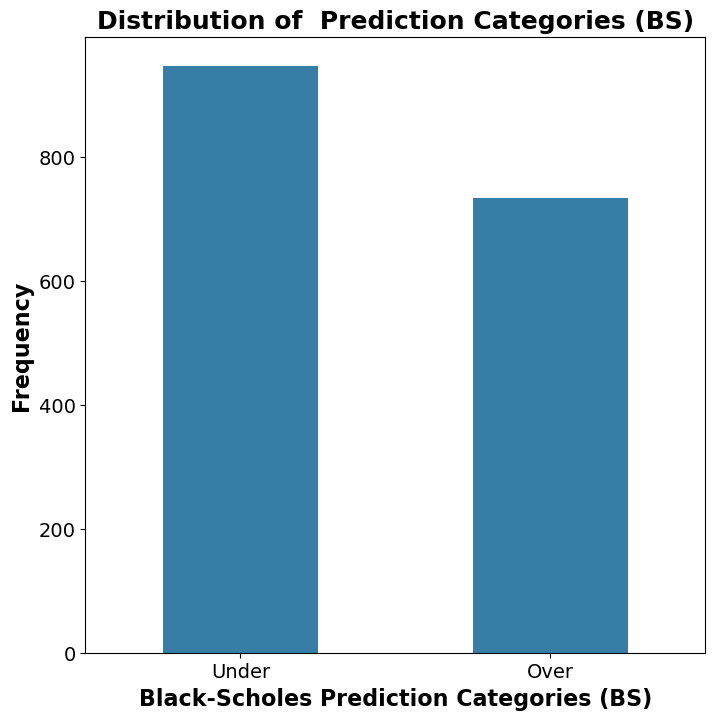

In [11]:
option_train["BS"].value_counts().head(20).plot(kind = 'bar',
                                                figsize = (8,8),
                                                color = '#377EA6')
plt.ylabel('Frequency',fontsize=16, fontweight="bold")
plt.xlabel('Black-Scholes Prediction Categories (BS)',fontsize=16, fontweight="bold")
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title('Distribution of  Prediction Categories (BS)', fontweight="bold",fontsize=18)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('white')  # Set background color

## Clean Data


In [12]:
# Encode categorical BS
option_train["BS"] = np.where(option_train.BS == "Over",1,0)
option_train.shape

(1680, 6)

In [13]:
# Drop Outliers
def outliers(option_train):
    zscore = lambda x: abs((x - x.mean()) / x.std())
    std_data = option_train.apply(zscore)
    outlier_indices = option_train[(std_data['K'] >= 3) |
                                   (std_data['tau'] >= 3) |
                                   (std_data['r'] >= 3) |
                                   #(std_data['Value'] >= 3) |
                                   (std_data['S'] >= 3)].index
    if len(outlier_indices.tolist()) > 0:
        print(outlier_indices)
        
    
    return outlier_indices.tolist()

outlier_rows = []
while len(outliers(option_train)) > 0:
    outliers_temp = outliers(option_train)
    outlier_rows += outliers_temp
    option_train = option_train.drop(outliers_temp)

Index([12, 33, 47], dtype='int64')
Index([12, 33, 47], dtype='int64')
Index([879], dtype='int64')
Index([879], dtype='int64')


In [14]:
# Inspect Nulls and Outliers
nulls_n_outliers = outlier_rows + rows_with_null.to_list() 
pd.read_csv("option_train.csv").iloc[nulls_n_outliers]

,Value,S,K,tau,r,BS
12,2.315001,448.688109,470.0,250.000000,0.03013,Over
33,2.565000,445.042240,455.0,146.000000,0.03003,Over
47,11.451273,40333.000000,425.0,0.043651,0.03147,Under
879,4.125000,0.000000,455.0,0.170635,0.03003,Over
53,NaN,446.718974,430.0,0.166667,0.02962,Under
292,8.625000,NaN,NaN,NaN,0.03003,Over
818,NaN,431.284616,NaN,0.230159,0.02972,Over


In [15]:
# I just dropped all NA record, but we should do imnputation
option_train.dropna(inplace=True)

In [16]:
option_train

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,0
1,0.125000,427.015526,465.0,0.166667,0.03126,1
2,20.691244,427.762336,415.0,0.265873,0.03116,0
3,1.035002,451.711658,460.0,0.063492,0.02972,1
4,39.553020,446.718974,410.0,0.166667,0.02962,0
...,...,...,...,...,...,...
1675,1.470000,444.397163,475.0,0.273810,0.03034,1
1676,34.927317,438.453825,410.0,0.301587,0.02972,0
1677,41.127997,428.042219,390.0,0.170635,0.03188,0
1678,0.440003,439.081203,480.0,0.293651,0.02962,1


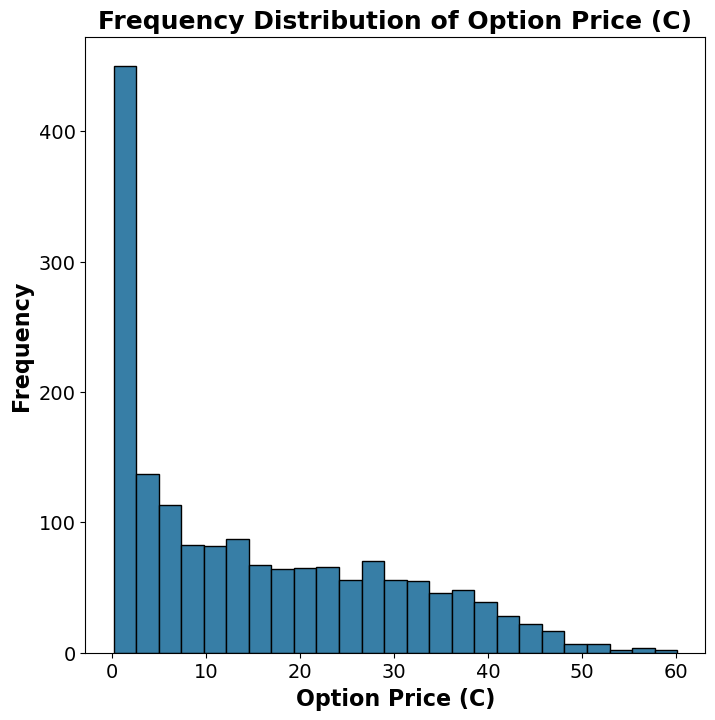

In [17]:
option_train["Value"].plot.hist(bins=25,edgecolor='black',figsize = (8,8), color = '#377EA6')
plt.ylabel('Frequency',fontsize=16, fontweight="bold")
plt.xlabel('Option Price (C)',fontsize=16, fontweight="bold")
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title('Frequency Distribution of Option Price (C)', fontweight="bold",fontsize=18)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('white')  # Set background color

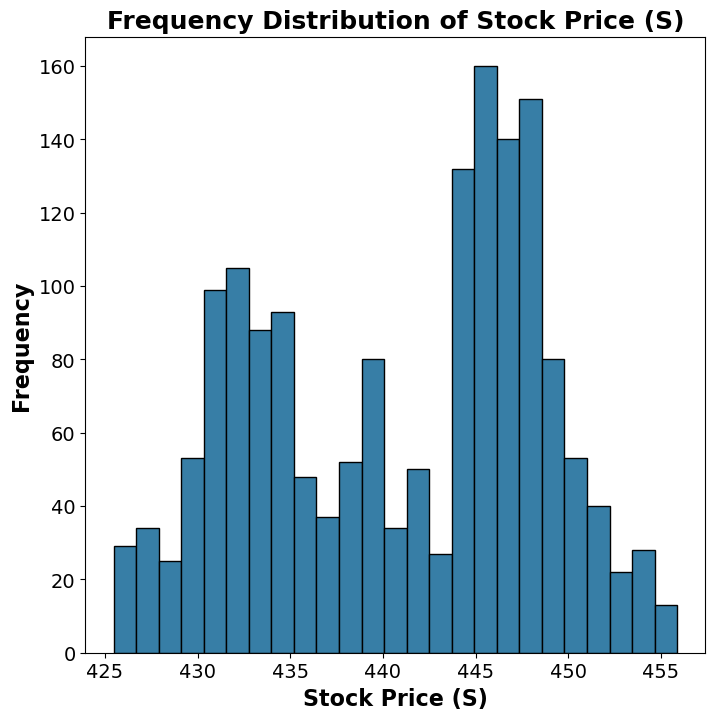

In [18]:
option_train["S"].plot.hist(bins=25,edgecolor='black',figsize = (8,8),
                                                color = '#377EA6')
#plt.ylabel('Log Frequency',fontsize=14)
plt.xlabel('Stock Price (S)',fontsize=16, fontweight="bold")
plt.ylabel('Frequency',fontsize=16, fontweight="bold")
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title('Frequency Distribution of Stock Price (S)', fontweight="bold",fontsize=18)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('white')  # Set background color

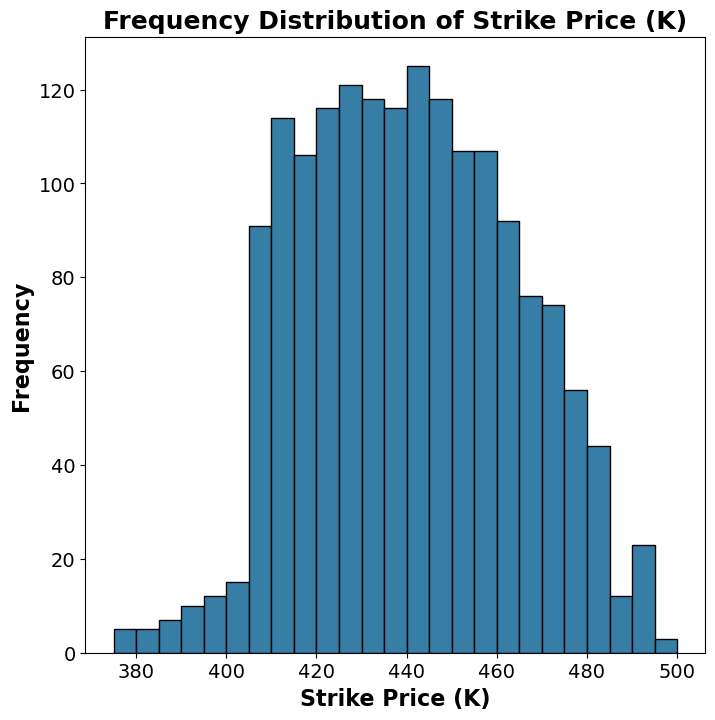

In [19]:
option_train["K"].plot.hist(bins=25,edgecolor='black',figsize = (8,8),
                                                color = '#377EA6')
plt.ylabel('Frequency',fontsize=16,fontweight="bold")
plt.xlabel('Strike Price (K)',fontsize=16,fontweight="bold")
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title('Frequency Distribution of Strike Price (K)', fontweight="bold",fontsize=18)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('white')  # Set background color

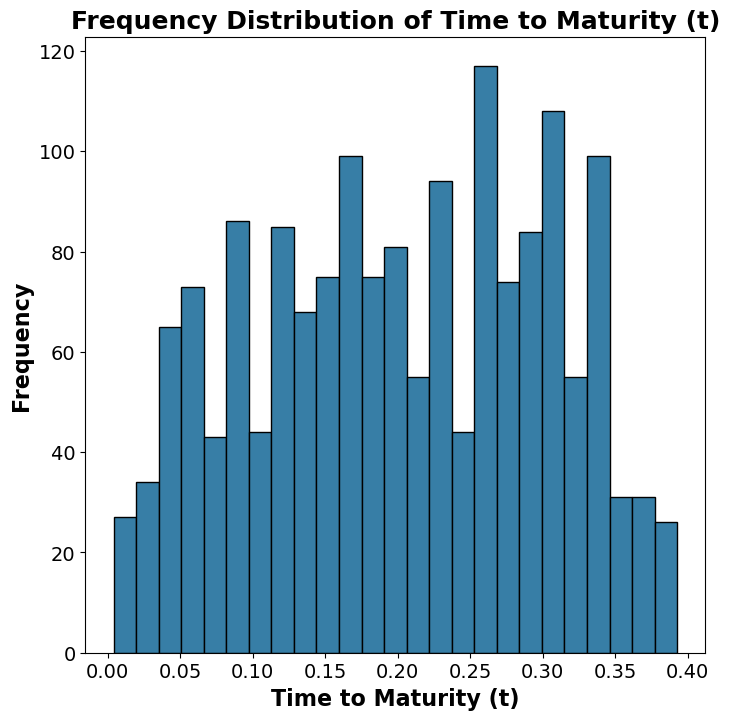

In [20]:
option_train["tau"].plot.hist(bins=25,edgecolor='black',figsize = (8,8),
                                                color = '#377EA6')
plt.ylabel('Frequency',fontsize=16, fontweight="bold")
plt.xlabel('Time to Maturity (t)',fontsize=16, fontweight="bold")
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title('Frequency Distribution of Time to Maturity (t)', fontweight="bold",fontsize=18)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('white')  # Set background color

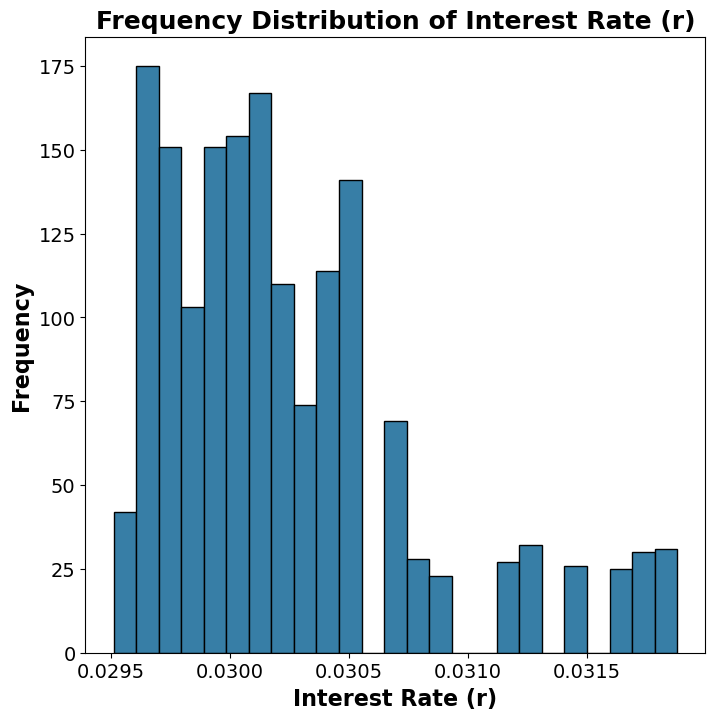

In [21]:
option_train["r"].plot.hist(bins=25,edgecolor='black',figsize = (8,8),
                                                color = '#377EA6')
plt.ylabel('Frequency',fontsize=16, fontweight="bold")
plt.xlabel('Interest Rate (r)',fontsize=16, fontweight="bold")
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title('Frequency Distribution of Interest Rate (r)', fontweight="bold",fontsize=18)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('white')  # Set background color

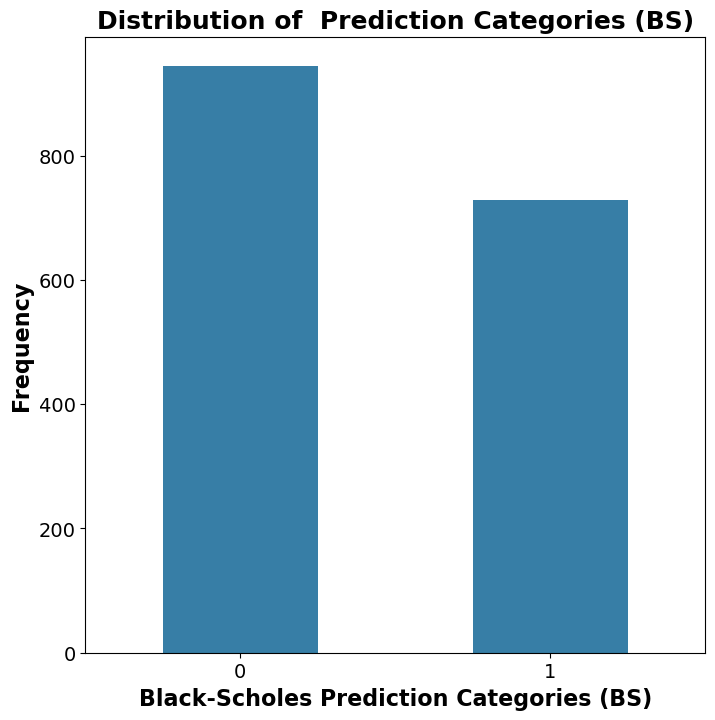

In [22]:
option_train["BS"].value_counts().head(20).plot(kind = 'bar',
                                                figsize = (8,8),
                                                color = '#377EA6')
plt.ylabel('Frequency',fontsize=16, fontweight="bold")
plt.xlabel('Black-Scholes Prediction Categories (BS)',fontsize=16, fontweight="bold")
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title('Distribution of  Prediction Categories (BS)', fontweight="bold",fontsize=18)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('white')  # Set background color

# Features Engineering

In [23]:
option_train['future_mult'] = (1+(option_train.r))**(option_train.tau)
option_train['S/K'] = option_train.S / option_train.K 

# Modeling

## Regression Objective

In [24]:
X = option_train[['S','K','tau','r','future_mult','S/K']]
y = option_train['Value']

In [25]:
option_train.shape

(1673, 8)

Tuning the best model of each kind using Cross Validation

In [26]:
# Linear Regression
kfolds = KFold(n_splits = 5, shuffle = True, random_state = 1)
reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv=kfolds, scoring='r2')
print('Cross-validation R-squared scores:', scores)
print('Mean cross-validation R-squared score:', scores.mean())

Cross-validation R-squared scores: [0.98455735 0.98241568 0.98257262 0.98198831 0.98131237]
Mean cross-validation R-squared score: 0.9825692660307956


In [27]:
# Tune DT
DT_reg = DecisionTreeRegressor(max_depth = 10,min_samples_leaf = 20)
scores = cross_val_score(DT_reg, X, y, cv=kfolds, scoring='r2')
print('Cross-validation R-squared scores:', scores)
print('Mean cross-validation R-squared score:', scores.mean())

Cross-validation R-squared scores: [0.98748174 0.9872328  0.99008716 0.99025926 0.99161092]
Mean cross-validation R-squared score: 0.989334373189321


In [28]:
# Tune RF
RF_Reg = RandomForestRegressor()
scores = cross_val_score(RF_Reg, X, y, cv=kfolds, scoring='r2')
print('Cross-validation R-squared scores:', scores)
print('Mean cross-validation R-squared score:', scores.mean())

Cross-validation R-squared scores: [0.9975342  0.99799978 0.99845443 0.99840292 0.99844959]
Mean cross-validation R-squared score: 0.9981681838873371


In [29]:
# Tune LGBM
LGBM_Reg = lgb.LGBMRegressor(verbosity=-1)
scores = cross_val_score(LGBM_Reg, X, y, cv=kfolds, scoring='r2')
print('Cross-validation R-squared scores:', scores)
print('Mean cross-validation R-squared score:', scores.mean())

Cross-validation R-squared scores: [0.99695062 0.99674154 0.99787168 0.99868612 0.9988402 ]
Mean cross-validation R-squared score: 0.9978180312296343


In [30]:
# Tune XGBoost
xgb_reg = xgb.XGBRegressor(n_estimators=1000,max_depth = 5)
scores = cross_val_score(xgb_reg, X, y, cv=kfolds, scoring='r2')
print('Cross-validation R-squared scores:', scores)
print('Mean cross-validation R-squared score:', scores.mean())

Cross-validation R-squared scores: [0.99822799 0.99852715 0.99892418 0.99880942 0.99893952]
Mean cross-validation R-squared score: 0.9986856524333405


In [31]:
# Tune Gadient Boosting
GBM_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=4)
scores = cross_val_score(GBM_reg, X, y, cv=kfolds, scoring='r2')
print('Cross-validation R-squared scores:', scores)
print('Mean cross-validation R-squared score:', scores.mean())

Cross-validation R-squared scores: [0.99873465 0.99891627 0.99937527 0.99928494 0.99935967]
Mean cross-validation R-squared score: 0.9991341590464469


In [32]:
def run_reg(X, y, counter):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    kfolds = KFold(n_splits = 5, shuffle = True)
    # LR
    reg = LinearRegression()
    scores = cross_val_score(reg, X, y, cv=kfolds, scoring='r2')
    reg.fit(X_train, y_train)
    reg_output['Model'][counter] = 'Linear\nRegression'
    reg_output['CV'][counter] = scores.mean()
    reg_output['Training'][counter] = reg.score(X_train, y_train)
    reg_output['Testing'][counter] = reg.score(X_test, y_test)
    counter += 1
    # DT
    dt_reg = DecisionTreeRegressor(max_depth = 10,min_samples_leaf = 20)
    scores = cross_val_score(dt_reg, X, y, cv=kfolds, scoring='r2')
    dt_reg.fit(X_train, y_train)
    reg_output['Model'][counter] = 'Decision\nTree'
    reg_output['CV'][counter] = scores.mean()
    reg_output['Training'][counter] = dt_reg.score(X_train, y_train)
    reg_output['Testing'][counter] = dt_reg.score(X_test, y_test)
    counter += 1
    # RF
    RF_Reg = RandomForestRegressor()
    scores = cross_val_score(RF_Reg, X, y, cv=kfolds, scoring='r2')
    RF_Reg.fit(X_train, y_train)
    reg_output['Model'][counter] = 'Random\nForest'
    reg_output['CV'][counter] = scores.mean()
    reg_output['Training'][counter] = RF_Reg.score(X_train, y_train)
    reg_output['Testing'][counter] = RF_Reg.score(X_test, y_test)
    counter += 1
    
    # LGBM
    LGBM_Reg = lgb.LGBMRegressor(verbosity=-1)
    scores = cross_val_score(LGBM_Reg, X, y, cv=kfolds, scoring='r2')
    LGBM_Reg.fit(X_train, y_train)
    reg_output['Model'][counter] = 'LightGBM'
    reg_output['CV'][counter] = scores.mean()
    reg_output['Training'][counter] = LGBM_Reg.score(X_train, y_train)
    reg_output['Testing'][counter] = LGBM_Reg.score(X_test, y_test)
    counter += 1

    # XGB
    xgb_reg = xgb.XGBRegressor(n_estimators=100,max_depth = 5)
    scores = cross_val_score(xgb_reg, X, y, cv=kfolds, scoring='r2')
    xgb_reg.fit(X_train, y_train)
    reg_output['Model'][counter] = 'XGBoost'
    reg_output['CV'][counter] = scores.mean()
    reg_output['Training'][counter] = xgb_reg.score(X_train, y_train)
    reg_output['Testing'][counter] = xgb_reg.score(X_test, y_test)
    counter += 1

    # GBM
    GBM_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4)
    scores = cross_val_score(GBM_reg, X, y, cv=kfolds, scoring='r2')
    GBM_reg.fit(X_train, y_train)
    reg_output['Model'][counter] = 'Gradient\nBoosting'
    reg_output['CV'][counter] = scores.mean()
    reg_output['Training'][counter] = GBM_reg.score(X_train, y_train)
    reg_output['Testing'][counter] = GBM_reg.score(X_test, y_test)
    counter += 1
    return counter

In [33]:
# Run each best model 100 times
reg_output = pd.DataFrame(columns=['Model','Training','CV','Testing'],index=range(1000))
for i in range(100):
    if i == 0:
        counter = 0
    print(i)
    counter = run_reg(X, y, counter)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


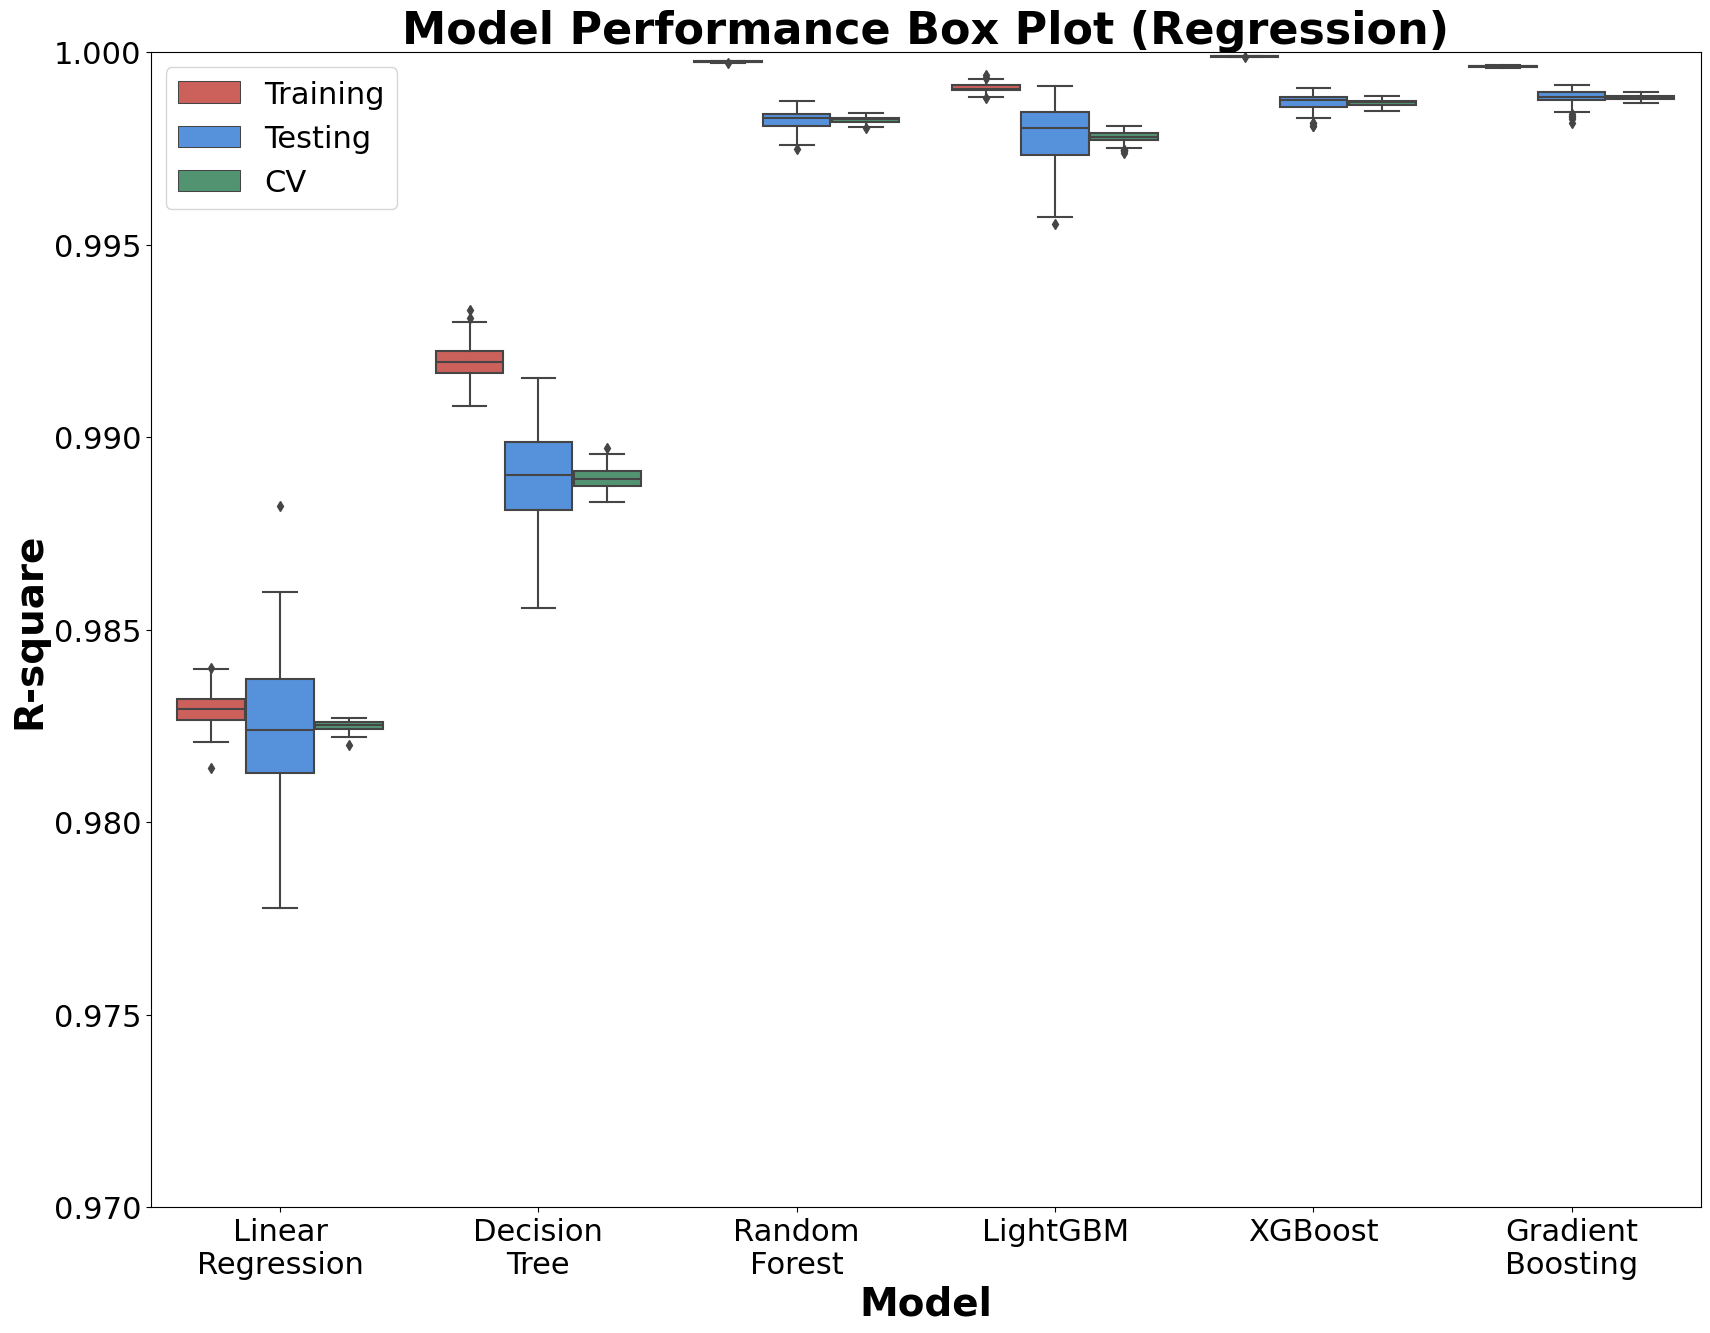

In [40]:
data_melt = pd.melt(reg_output, id_vars='Model', var_name='Type', value_name='Score')
custom_palette = ['#DF5049', '#4090F1', '#479F71']
custom_hue_order = ['Training', 'Testing', 'CV']
# create the box plot
plt.figure(figsize=(20,15))
ax = sns.boxplot(x='Model', y='Score', hue='Type', data=data_melt, 
            palette = custom_palette, hue_order=custom_hue_order)
# ax = sns.boxplot(x='Model',y='Score',hue='Type', data=data_melt, palette=['b','g'])

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Model', fontsize=28, fontweight='bold')
plt.ylabel('R-square', fontsize=28, fontweight='bold')
plt.title('Model Performance Box Plot (Regression)', fontsize=32,fontweight='bold')
ax.set_ylim(0.97, 1)
# make the legend bigger
ax = plt.gca()
legend = ax.legend(fontsize=22)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('white')  # Set background color

plt.show()

In [41]:
len(reg_output[(reg_output.Model == "Gradient\nBoosting")&(reg_output.Testing >=.9985)])/100

0.92

In [42]:
len(reg_output[(reg_output.Model == "Random\nForest")&(reg_output.Testing >=.9985)])/100

0.11

In [43]:
len(reg_output[(reg_output.Model == "XGBoost")&(reg_output.Testing >=.9985)])/100

0.86

In [45]:
reg_output.dropna()

,Model,Training,CV,Testing
0,Linear\nRegression,0.982415,0.982698,0.98465
1,Decision\nTree,0.991923,0.988759,0.987217
2,Random\nForest,0.999773,0.998364,0.998065
3,LightGBM,0.999124,0.997934,0.997324
4,XGBoost,0.999888,0.998723,0.998537
...,...,...,...,...
595,Decision\nTree,0.991649,0.9884,0.989584
596,Random\nForest,0.999753,0.998243,0.998487
597,LightGBM,0.999141,0.99771,0.998163
598,XGBoost,0.999908,0.998729,0.998891


In [46]:
data_melt.groupby(["Model","Type"])["Score"].mean().to_frame()

Score
Model              Type              
Decision\nTree     CV        0.988925
                   Testing   0.989028
                   Training   0.99194
Gradient\nBoosting CV        0.998827
                   Testing   0.998817
                   Training  0.999634
LightGBM           CV        0.997795
                   Testing   0.997825
                   Training  0.999069
Linear\nRegression CV        0.982514
                   Testing   0.982412
                   Training  0.982935
Random\nForest     CV        0.998243
                   Testing    0.99823
                   Training  0.999751
XGBoost            CV        0.998678
                   Testing   0.998699
                   Training   0.99989

In [47]:
# Look at the Linear Regression model to understand the features interactions
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())
mse = mean_squared_error(y, model.predict(X))

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.594e+04
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        23:15:49   Log-Likelihood:                -3392.1
No. Observations:                1673   AIC:                             6798.
Df Residuals:                    1666   BIC:                             6836.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -839.9768    863.510     -0.973      

In [48]:
print(mse)

3.3780015980192974


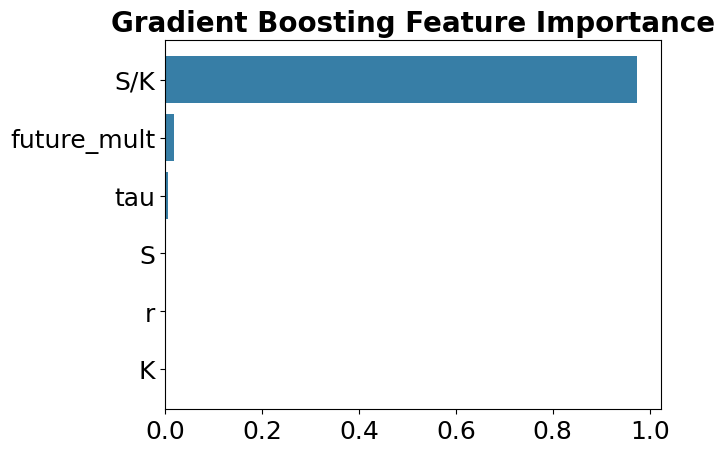

In [51]:
import matplotlib.pyplot as plt
X = option_train[['S','K','tau','r','future_mult','S/K']]

model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=4)
model.fit(X, y)

# Plot the feature importance barplot
feature_importance = model.feature_importances_
feature_names = ['S','K','tau','r','future_mult','S/K']
sorted_idx = feature_importance.argsort()

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx],color = '#377EA6')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx],fontsize=18)
plt.xticks(fontsize=18)
plt.title('Gradient Boosting Feature Importance', fontsize=20,fontweight='bold')
fig = plt.gcf()  # Get current figure
fig.set_facecolor('white')  # Set background color
plt.show()

In [52]:
from sklearn.metrics import r2_score
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=4)
model.fit(X, y)

y_train_pred = model.predict(X)

# calculate the difference between the predicted and actual y values
residuals = y_train_pred - y

# calculate the mean squared error (MSE)
mse = (residuals ** 2).mean()

# print the MSE as the training error
print("Training error:", mse)

r2_train = r2_score(y, y_train_pred)

print("Training R-squared:", r2_train)

Training error: 0.0032000587952125932
Training R-squared: 0.9999837805713719


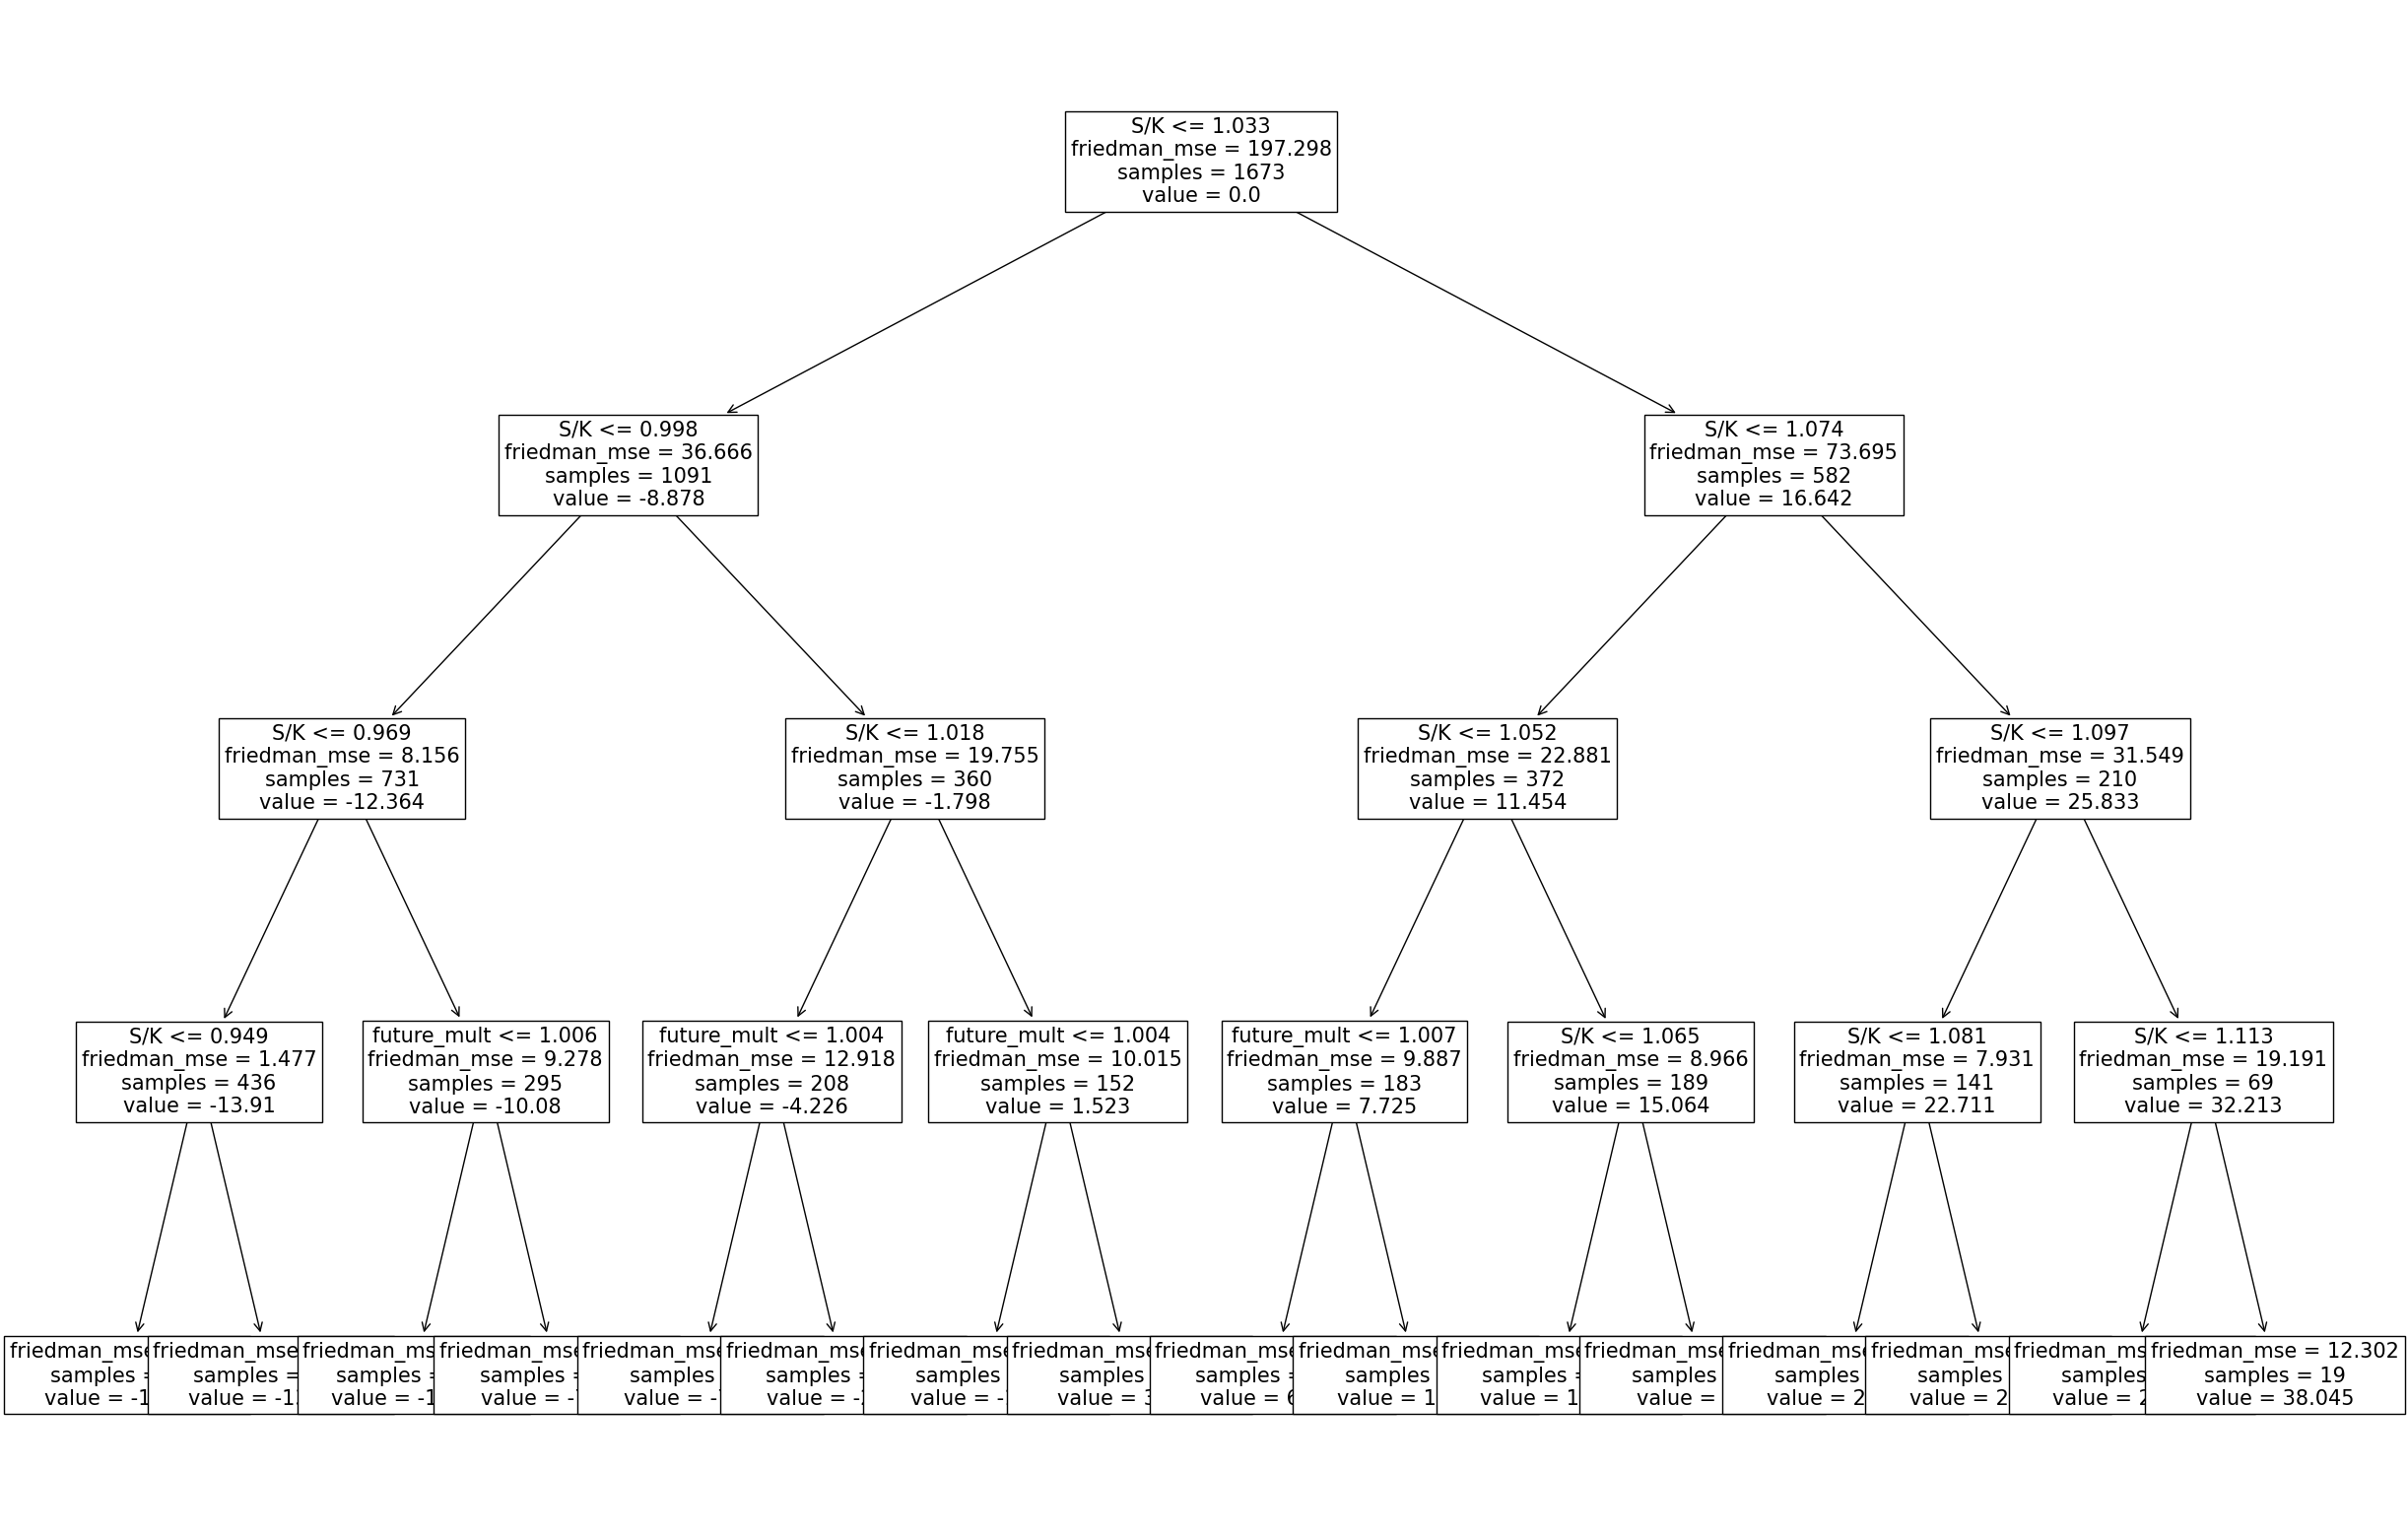

In [53]:
from sklearn.tree import plot_tree

model.fit(X, y)
plt.figure(figsize=(30,20))
plot_tree(model.estimators_[0][0],fontsize=15, feature_names = feature_names)
plt.gca().invert_yaxis()
plt.show()

## Classification Objective

In [54]:
option_train = pd.read_csv("option_train.csv")
option_train["cat"] = np.where(option_train.BS == "Over",1,0)
option_train = option_train.drop('BS', axis=1)
print(option_train.shape)
option_train.dropna(inplace=True)
option_train['future_mult'] = (1+(option_train.r))**(option_train.tau)
option_train['S/K'] = option_train.S / option_train.K 

(1680, 6)


In [68]:
def outliers(option_train):
    zscore = lambda x: abs((x - x.mean()) / x.std())
    std_data = option_train.apply(zscore)
    outlier_indices = option_train[(std_data['K'] >= 3) |
                                   (std_data['tau'] >= 3) |
                                   (std_data['r'] >= 3) |
                                   (std_data['S'] >= 3)].index
    if len(outlier_indices.values) > 0:
        print(outlier_indices)
        
    
    return outlier_indices

while len(outliers(option_train).values) > 0:
    option_train = option_train.drop(outliers(option_train))
len(outliers(option_train).values)


Index([12, 33, 47], dtype='int64')
Index([12, 33, 47], dtype='int64')
Index([879], dtype='int64')
Index([879], dtype='int64')


0

In [24]:
# Set y label
y_cat = option_train['BS']
X = option_train[['S','K','tau','r','future_mult','S/K']]

In [25]:
option_train.shape

(1673, 8)

In [32]:
# Tune DT
kfolds = StratifiedKFold(n_splits = 5, shuffle = True,random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, stratify=y_cat, test_size=0.2)

DTClassifier = DecisionTreeClassifier(max_depth = 5, 
                                min_samples_split = 20,
                                min_samples_leaf = 10)
scores = cross_val_score(DTClassifier, X_train, y_train, cv=kfolds)
print(scores)
print("CV Accuracy: {}".format(scores.mean()))

[0.92537313 0.91791045 0.90671642 0.92134831 0.90636704]
CV Accuracy: 0.9155430711610487


In [33]:
# Tune LGBMClassifier
from lightgbm import LGBMClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, stratify=y_cat, test_size=0.2,random_state = 1)
kfolds = StratifiedKFold(n_splits = 5, shuffle = True,random_state = 1)
LGBMClassifier = LGBMClassifier(n_estimators = 10, 
                                max_depth = 5, 
                                num_leaves = 20,
                                learning_rate = 0.1, verbose = -1)
scores = cross_val_score(LGBMClassifier, X_train, y_train, cv=kfolds)
print(scores)
print("CV Accuracy: {}".format(scores.mean()))

[0.9141791  0.92537313 0.92537313 0.917603   0.94007491]
CV Accuracy: 0.9245206551512103


In [34]:
# Tune RandomForestClassifier
kfolds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)
rf_cla = RandomForestClassifier(n_estimators = 75, 
                                max_depth = 5, 
                                max_features = 5,
                                min_samples_split = 25,
                                min_samples_leaf = 10)
scores = cross_val_score(rf_cla, X, y_cat, cv=kfolds)
print(scores)
print("CV Accuracy: {}".format(scores.mean()))

[0.91940299 0.91343284 0.92537313 0.92215569 0.93113772]
CV Accuracy: 0.9223004736795067


In [35]:
# Tune XGBClassifier
kfolds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)
xgb_cla = XGBClassifier(n_estimators = 50,
                        max_depth = 5,
                        learning_rate = 0.01,
                        subsample = 0.25,
                        gamma = 0.3)
scores = cross_val_score(xgb_cla, X, y_cat, cv=kfolds)
print(scores)
print("CV Accuracy: {}".format(scores.mean()))

[0.91343284 0.91940299 0.93134328 0.91017964 0.92814371]
CV Accuracy: 0.920500491554205


In [36]:
# Tune CatBoost 
import catboost as cb
kfolds = StratifiedKFold(n_splits = 5, shuffle = True,random_state = 1)
catboost_cla = cb.CatBoostClassifier(iterations=75,
                                     depth = 10,
                                     learning_rate = 0.1,
                                     verbose = 0,
                                     l2_leaf_reg = 25,
                                     loss_function='Logloss')
scores = cross_val_score(catboost_cla, X, y_cat, cv=kfolds)
print(scores)
print("CV Accuracy: {}".format(scores.mean()))

[0.91044776 0.91343284 0.93134328 0.93413174 0.94011976]
CV Accuracy: 0.9258950755206005


In [39]:
from lightgbm import LGBMClassifier
def run_cla(X, y, counter):
    X_train, X_test, y_train, y_test = train_test_split(X, y_cat, stratify=y_cat, test_size=0.2)
    kfolds = StratifiedKFold(n_splits = 5, shuffle = True)
    
    # Logistic Regression 
    LR = LogisticRegression()
    scores = cross_val_score(LR, X, y_cat, cv=kfolds)
    LR.fit(X_train, y_train)
    cla_output['Model'][counter] = 'Logistic\nRegression'
    cla_output['CV'][counter] = scores.mean()
    cla_output['Training'][counter] = LR.score(X_train, y_train)
    cla_output['Testing'][counter] = LR.score(X_test, y_test)
    counter += 1
    
    # Decision Tree Classifier
    DTClassifier = DecisionTreeClassifier(max_depth = 5, 
                                min_samples_split = 20,
                                min_samples_leaf = 10)
    scores = cross_val_score(DTClassifier,X, y_cat, cv=kfolds)
    DTClassifier.fit(X_train, y_train)
    cla_output['Model'][counter] = 'Decision\nTree'
    cla_output['CV'][counter] = scores.mean()
    cla_output['Training'][counter] = DTClassifier.score(X_train, y_train)
    cla_output['Testing'][counter] = DTClassifier.score(X_test, y_test)
    counter += 1
    
    # RandomForestClassifier
    rf_cla = RandomForestClassifier(n_estimators = 75, 
                                max_depth = 5, 
                                max_features = 5,
                                min_samples_split = 25,
                                min_samples_leaf = 10)
    scores = cross_val_score(rf_cla, X, y_cat, cv=kfolds)
    rf_cla.fit(X_train, y_train)
    cla_output['Model'][counter] = 'Random\nForest'
    cla_output['CV'][counter] = scores.mean()
    cla_output['Training'][counter] = rf_cla.score(X_train, y_train)
    cla_output['Testing'][counter] = rf_cla.score(X_test, y_test)
    counter += 1
    
    # LGBMClassifier
    LGBMCla = LGBMClassifier(n_estimators = 12, 
                             max_depth = 5, 
                             num_leaves = 20,
                             learning_rate = 0.1, verbose = -1)
    scores = cross_val_score(LGBMCla, X, y_cat, cv=kfolds)
    LGBMCla.fit(X_train, y_train)
    cla_output['Model'][counter] = 'LightGBM'
    cla_output['CV'][counter] = scores.mean()
    cla_output['Training'][counter] = LGBMCla.score(X_train, y_train)
    cla_output['Testing'][counter] = LGBMCla.score(X_test, y_test)
    counter += 1
    
    # XGBClassifier
    xgb_cla = XGBClassifier(n_estimators = 50,
                        max_depth = 5,
                        learning_rate = 0.01,
                        subsample = 0.25,
                        gamma = 0.3)
    scores = cross_val_score(xgb_cla, X, y_cat, cv=kfolds)
    xgb_cla.fit(X_train, y_train)
    cla_output['Model'][counter] = 'XGBoost'
    cla_output['CV'][counter] = scores.mean()
    cla_output['Training'][counter] = xgb_cla.score(X_train, y_train)
    cla_output['Testing'][counter] = xgb_cla.score(X_test, y_test)
    counter += 1
    
    #CatBoost
    catboost_cla = cb.CatBoostClassifier(iterations=75,
                                     depth = 10,
                                     learning_rate = 0.1,
                                     verbose = 0,
                                     l2_leaf_reg = 25,
                                     loss_function='Logloss')
    scores = cross_val_score(catboost_cla, X, y_cat, cv=kfolds)
    catboost_cla.fit(X_train, y_train)
    cla_output['Model'][counter] = 'CatBoost'
    cla_output['CV'][counter] = scores.mean()
    cla_output['Training'][counter] = catboost_cla.score(X_train, y_train)
    cla_output['Testing'][counter] = catboost_cla.score(X_test, y_test)
    counter += 1
    return counter

In [40]:
cla_output = pd.DataFrame(columns=['Model','Training','CV','Testing'],index=range(1000))
for i in range(100):
    if i == 0:
        counter = 0
    print(i)
    counter = run_cla(X, y_cat, counter)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


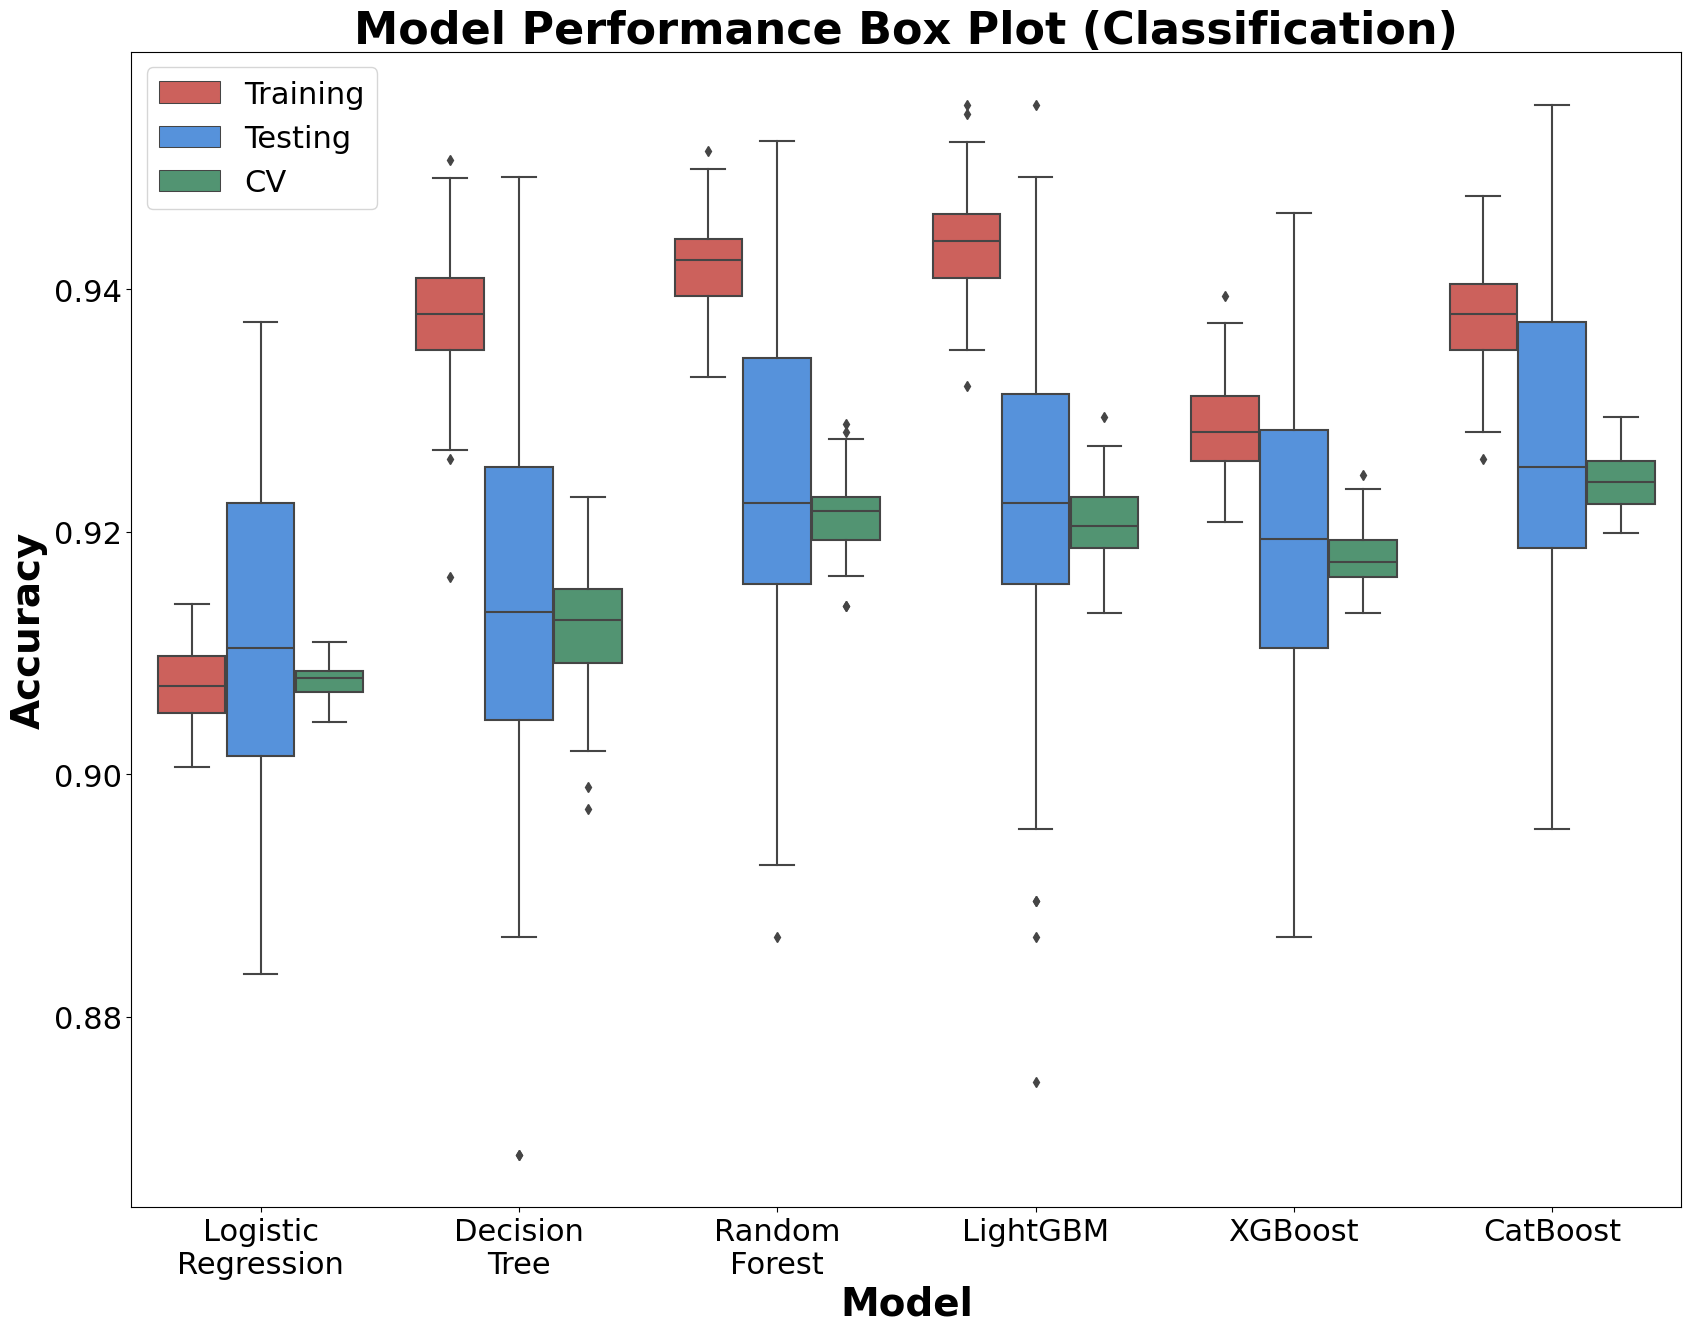

In [49]:
data_melt = pd.melt(cla_output, id_vars='Model', var_name='Type', value_name='Score')
custom_palette = ['#DF5049', '#4090F1', '#479F71']
custom_hue_order = ['Training', 'Testing', 'CV']
# create the box plot
plt.figure(figsize=(20,15))
sns.boxplot(x='Model', y='Score', hue='Type', data=data_melt,
           palette = custom_palette, hue_order=custom_hue_order)
# ax = sns.boxplot(x='Model',y='Score',hue='Type', data=data_melt, palette=['b','g'])

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Model', fontsize=28, fontweight='bold')
plt.ylabel('Accuracy', fontsize=28, fontweight='bold')
plt.title('Model Performance Box Plot (Classification)', fontsize=32,fontweight='bold')
ax.set_ylim(0.97, 1)
# make the legend bigger
ax = plt.gca()
legend = ax.legend(fontsize=22)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('white')  # Set background color

plt.show()

In [50]:
len(cla_output[(cla_output.Model == "CatBoost")&(cla_output.Testing >=.92)])/100

0.7

In [51]:
len(cla_output[(cla_output.Model == "CatBoost")&(cla_output.Testing >=.9)])/100

0.98

In [52]:
data_melt.groupby(["Model","Type"])["Score"].mean().to_frame()

Score
Model                Type              
CatBoost             CV        0.924227
                     Testing   0.926866
                     Training  0.938012
Decision\nTree       CV        0.912177
                     Testing   0.914448
                     Training  0.937735
LightGBM             CV        0.920657
                     Testing   0.922149
                     Training  0.943729
Logistic\nRegression CV         0.90771
                     Testing   0.910537
                     Training  0.907511
Random\nForest       CV        0.921399
                     Testing   0.923403
                     Training   0.94201
XGBoost              CV        0.917822
                     Testing   0.919791
                     Training   0.92861

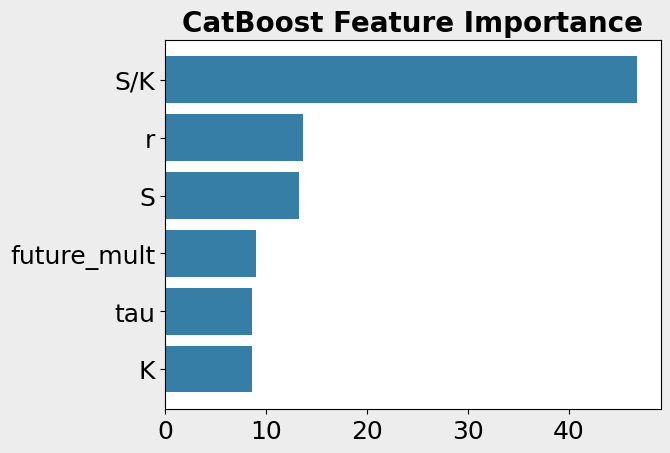

In [53]:
model = cb.CatBoostClassifier(iterations=75,
                                     depth = 10,
                                     learning_rate = 0.1,
                                     verbose = 0,
                                     l2_leaf_reg = 25,
                                     loss_function='Logloss')
model.fit(X, y_cat)

# Plot the feature importance barplot
feature_importance = model.feature_importances_
feature_names = ['S','K','tau','r','future_mult','S/K']
sorted_idx = feature_importance.argsort()

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx],color = '#377EA6')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx],fontsize=18)
plt.xticks(fontsize=18)
plt.title('CatBoost Feature Importance', fontsize=20,fontweight='bold')
fig = plt.gcf()  # Get current figure
fig.set_facecolor('#EDEDED')  # Set background color

plt.show()

In [54]:
import statsmodels.api as sm
# fit logistic regression model
X = sm.add_constant(X)
logit_model = sm.Logit(y_cat, X)
result = logit_model.fit()

# print model summary
print(result.summary())

         Current function value: 4.945567
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                     BS   No. Observations:                 1673
Model:                          Logit   Df Residuals:                     1666
Method:                           MLE   Df Model:                            6
Date:                Wed, 29 May 2024   Pseudo R-squ.:                  -6.221
Time:                        23:23:36   Log-Likelihood:                -8273.9
converged:                      False   LL-Null:                       -1145.8
Covariance Type:            nonrobust   LLR p-value:                     1.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.682e+05   2.43e+05      3.572      0.000    3.92e+05    1.34e+06
S              40.2815     11.449      3.518      0.000      1

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [257]:
import keras
def create_model_logi():
# Input layer: 3 input nodes
# single hidden layer having 4 nodes
# Output layer: 1 node
# Activation function: Sigmoid for function for both hidden layers and
# Cost function: binary cross-entropy loss
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(5, input_shape=(6,), activation="linear"))
    model.add(keras.layers.Dense(10, activation='linear'))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                  loss="binary_crossentropy", metrics=["accuracy"])
    return model
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, stratify=y_cat, test_size=0.2)
kfolds = StratifiedKFold(n_splits = 5, shuffle = True)
model_logi = create_model_logi()
model_logi.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.1, verbose=0)

score = model_logi.evaluate(X, y_cat)
print(score)
print("Train: {}".format(model_logi.evaluate(X_train, y_train)[1]))
print("Test: {}".format(model_logi.evaluate(X_test, y_test)[1]))

53/53 [==============================] - 0s 335us/step - loss: 0.2414 - accuracy: 0.8989
[0.24140238761901855, 0.8988629579544067]
42/42 [==============================] - 0s 343us/step - loss: 0.2446 - accuracy: 0.8982
Train: 0.8982036113739014
11/11 [==============================] - 0s 383us/step - loss: 0.2287 - accuracy: 0.9015
Test: 0.9014925360679626


# Production: Make Prediction

In [55]:
option_train = pd.read_csv("option_train.csv")
option_train.dropna(inplace=True)
option_train["cat"] = np.where(option_train.BS == "Over",1,0)
option_train = option_train.drop('BS', axis=1)
print(option_train.shape)
option_train['future_mult'] = (1+(option_train.r))**(option_train.tau)
option_train['S/K'] = option_train.S / option_train.K 

(1677, 6)


In [56]:
def outliers(option_train):
    zscore = lambda x: abs((x - x.mean()) / x.std())
    std_data = option_train.apply(zscore)
    outlier_indices = option_train[(std_data['K'] >= 3) |
                                   (std_data['tau'] >= 3) |
                                   (std_data['r'] >= 3) |
                                   (std_data['S'] >= 3)].index
    if len(outlier_indices.values) > 0:
        print(outlier_indices)
        
    
    return outlier_indices

while len(outliers(option_train).values) > 0:
    option_train = option_train.drop(outliers(option_train))
len(outliers(option_train).values)

# Set y label
y_cat = option_train['cat']
X = option_train[['S','K','tau','r','future_mult','S/K']]
y = option_train['Value']

Index([12, 33, 47], dtype='int64')
Index([12, 33, 47], dtype='int64')
Index([879], dtype='int64')
Index([879], dtype='int64')


In [57]:
X_option_test = pd.read_csv("option_test_wolabel.csv")

In [58]:
# Make new features for test set
X_option_test['future_mult'] = (1+(X_option_test.r))**(X_option_test.tau)
X_option_test['S/K'] = X_option_test.S / X_option_test.K 

In [59]:
reg_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4)

cla_model = cb.CatBoostClassifier(iterations=75,
                                     depth = 10,
                                     learning_rate = 0.1,
                                     verbose = 0,
                                     l2_leaf_reg = 25,
                                     loss_function='Logloss')

In [60]:
reg_model = reg_model.fit(X, y)
cla_model = cla_model.fit(X, y_cat)

In [61]:
from sklearn.metrics import r2_score

y_train_pred = reg_model.predict(X)

# calculate the difference between the predicted and actual y values
residuals = y_train_pred - y

# calculate the mean squared error (MSE)
mse = (residuals ** 2).mean()

# print the MSE as the training error
print("Training error:", mse)

r2_train = r2_score(y, y_train_pred)

print("Regression Training R-squared:", r2_train)

y_train_pred_cat = cla_model.predict(X)
print("Classification Training Acuracy:", (y_train_pred_cat==y_cat).mean())

Training error: 0.07436416381041648
Regression Training R-squared: 0.9996230868479005
Classification Training Acuracy: 0.9390316796174537


In [62]:
# Make prediction
pred_val = reg_model.predict(X_option_test)
pred_BS = cla_model.predict(X_option_test)

In [63]:
df = pd.DataFrame({'Value': pred_val, 'BS': pred_BS})
print(df)

          Value  BS
0      1.159198   1
1     18.402101   0
2     10.611594   0
3     24.079087   0
4     16.494393   0
...         ...  ..
1115  11.596991   0
1116   0.326605   1
1117   0.621075   1
1118  23.489521   0
1119  15.336900   0

[1120 rows x 2 columns]


In [65]:
df[df.Value<=0]

,Value,BS
46,-0.003068,1
217,-0.007710,1
268,-0.010767,1
321,-0.083853,1


In [66]:
(df.BS==1).mean()

0.49375

In [67]:
(y_cat==1).mean()

0.43574417214584577

In [68]:
df.to_csv("group_21_prediction.csv", index=False)